In [2]:
# My Google Drive Mount하기!
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Term Document Matrix
1. =단어 문서 행렬
2. 문서별로 단어의 빈도(term frequency)를 정리한 표

* Document 1: 오늘은 밥을 먹었다.
* Document 2: 어제도 밥, 오늘도 밥

TDM:
* Document 1: 오늘(1), 어제(0), 밥(1), 먹다(1)
* Document 2: 오늘(1), 어제(1), 밥(1), 먹다(0)

### Strength and Weakness of TDM
* Unstructured(비정형) Data (=Text) → Structured(정형) Data (Table)
* Applies Statistical Methods to the Structured Data
* Strength: It's simple!
* Weakness: It doesn't take into account "the order and context" of the documents.

### Sparse Matrix (희소 행렬)
* Almost every element of the Sparse Matrix is 0(zero).
* opposite to "Dense Matrix" (조밀 행렬)
* In order to save the memory and size: 0을 빼고 저장하는 압축 방법을 사용!

# Term Document Matrix: Practice!

In [3]:
import pandas as pd

FolderPath = '/content/drive/MyDrive/03. Kookmin AI Big Data MBA/Semester 3_032021-062021/1. Text Data Analytics/Lecture Notes Review/data'
FName = 'imdb.xlsx'
FPath = FolderPath + '/' + FName

df = pd.read_excel(FPath, index_col=0)
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
df.shape

(748, 2)

### Create the TDM

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(
    max_features=500,
    stop_words='english'
)

# CountVectorizer: Token이 Document별로 몇 번 등장했는지 Matrix로 정리해준다.
    # - 특별히 방법을 지정하지 않으면, Blank(빈 칸)를 기준으로 Token을 구분함
# max_features: TDM에 포함시킬 최대 단어(feature) 수
    # - frequency 순으로 최대 500 단어까지 포함함
# stop_words: 분석에서 제외할 불용어를 설정하는 옵션
    # - 'english': 관사와 전치사를 제외함
    # - 다른 언어의 경우 list 등의 형태로 불용어 목록을 지정해줘야 함

In [6]:
tdm = cv.fit_transform(df['review'])
print(tdm.shape)

(748, 500)


### Term List

In [7]:
cv.get_feature_names()[:10]

# Notice: Term List exists on 'tdm', NOT on 'cv'! Be careful.

['10',
 '20',
 '90',
 'absolutely',
 'acted',
 'acting',
 'action',
 'actor',
 'actors',
 'actress']

### Total Frequency of All the Terms

In [8]:
# Frequency of Each Term
tdm.sum(axis=0)

matrix([[ 29,   3,   6,   9,   3,  43,   7,  10,  19,   3,   3,  10,   3,
           4,   3,   4,   9,   3,   3,   3,   6,   3,   4,   3,  13,   4,
           3,   5,   3,   8,   5,   3,  14,  71,   4,  11,   4,   6,   8,
          25,  18,  10,   5,  10,   4,   3,   4,  10,   3,   3,   6,   7,
           3,   4,  10,   5,   3,  18,   6,   8,  24,  35,   4,   3,   7,
           3,   4,   5,   8,  10,   6,   5,   5,   7,   4,   3,   3,   5,
           3,   3,   4,   4,   7,   4,   5,   3,   4,   6,   4,   3,   5,
           4,   3,   5,   4,   3,   9,   3,   4,   3,  13,  11,  22,   5,
           3,   9,   5,  12,   6,   3,   9,  12,  26,   4,  10,   3,   3,
           3,   3,   4,   4,   3,   6,   3,   9,  11,  11,   4,   5,   3,
           9,   4,   6,   3,   8,   3,   3,  16,   4,   7,   4,   4,   5,
           8,   5,   7,   5,   7,   5,   3,   3,  10,   5, 163,  24,   3,
           3,   5,   6,   4,   5,  19,   3,   9,   3,   7,   5,   3,   4,
           3,   6,   3,   7,   3,   6,

In [9]:
# Frequency of Each Document
tdm.sum(axis=1)

matrix([[  5],
        [  5],
        [ 12],
        [  3],
        [  6],
        [  7],
        [  2],
        [  7],
        [  2],
        [  2],
        [  1],
        [  4],
        [  3],
        [  1],
        [  5],
        [  5],
        [  6],
        [ 10],
        [  3],
        [229],
        [  5],
        [  2],
        [  5],
        [  3],
        [  1],
        [  2],
        [  4],
        [  2],
        [  7],
        [  3],
        [  1],
        [  0],
        [  1],
        [  3],
        [  4],
        [  6],
        [  3],
        [  6],
        [ 11],
        [  3],
        [  4],
        [  3],
        [  2],
        [  0],
        [  0],
        [  6],
        [  4],
        [  3],
        [  1],
        [  8],
        [  5],
        [  5],
        [  2],
        [  2],
        [  4],
        [  5],
        [  5],
        [  1],
        [  2],
        [  4],
        [  3],
        [  4],
        [  0],
        [  1],
        [  2],
        [  3],
        [ 

In [10]:
WordCount_df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'frequency': tdm.sum(axis=0).flat
})

WordCount_df = WordCount_df.sort_values('frequency', ascending=False).reset_index(drop=True)
WordCount_df.head()

,word,frequency
0,movie,182
1,film,163
2,bad,71
3,just,63
4,good,58


### Save the file

In [11]:
WordCount_df.to_csv(FolderPath + '/' + 'WordCount_df.csv')

# Word Cloud!

### Load the data

In [12]:
WordCount_df = pd.read_csv(FolderPath + '/' + 'WordCount_df.csv', index_col=0)
WordCount_df.head()

,word,frequency
0,movie,182
1,film,163
2,bad,71
3,just,63
4,good,58


### Word Cloud

In [13]:
from wordcloud import WordCloud

# parameters in WordCloud
    # font_path: 글꼴의 경로
    # max_words: number of words to draw in WordCloud
    # background_color: 배경색
    # width: number of pixels in width
    # height: number of pixels in height

wc = WordCloud(
    background_color='black',
    max_words=100,
    width=400,
    height=300
)

In [14]:
WordCount_dict = dict(zip(WordCount_df['word'], WordCount_df['frequency']))
# or same below!
# WordCount_dict = WordCount_df.set_index('word')['frequency'].to_dict()
WordCount_dict

{'10': 29,
 '20': 3,
 '90': 6,
 'absolutely': 9,
 'acted': 3,
 'acting': 43,
 'action': 7,
 'actor': 10,
 'actors': 19,
 'actress': 3,
 'actresses': 3,
 'actually': 10,
 'addition': 3,
 'adorable': 4,
 'aerial': 3,
 'age': 4,
 'amazing': 9,
 'angel': 3,
 'animation': 3,
 'anne': 3,
 'annoying': 6,
 'appearance': 3,
 'appreciate': 4,
 'aren': 3,
 'art': 13,
 'attempt': 4,
 'attention': 3,
 'audience': 5,
 'average': 3,
 'avoid': 8,
 'away': 5,
 'awesome': 3,
 'awful': 14,
 'bad': 71,
 'barely': 4,
 'beautiful': 11,
 'beginning': 4,
 'believable': 6,
 'believe': 8,
 'best': 25,
 'better': 18,
 'big': 10,
 'bit': 5,
 'black': 10,
 'book': 4,
 'bore': 3,
 'bored': 4,
 'boring': 10,
 'bought': 3,
 'brilliance': 3,
 'brilliant': 6,
 'budget': 7,
 'called': 3,
 'came': 4,
 'camera': 10,
 'care': 5,
 'cartoon': 3,
 'cast': 18,
 'casting': 6,
 'certainly': 8,
 'character': 24,
 'characters': 35,
 'charles': 4,
 'charming': 3,
 'cheap': 7,
 'checking': 3,
 'chemistry': 4,
 'child': 5,
 'cinema':

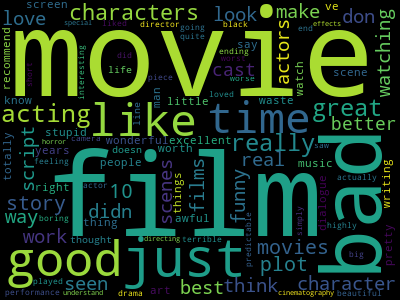

In [15]:
cloud = wc.fit_words(WordCount_dict)
cloud.to_image()

### Save the Cloud

In [16]:
cloud.to_file(FolderPath + '/' + 'cloud.png')

FYI, you can see what is the current working directory like below!

In [17]:
import os
os.getcwd()

'/content'

# TDM's problems
* Assume that: "Term Frequency가 비슷한 Document = 의미가 비슷한 Document!"
* BUT, this oftentimes makes errors!
* e.g., 특정한 Term이 무의미하게 반복되는 경우
* HOW TO SOLVE?: Term Frequency에 적절한 Weights를 주어 극복!

# Weights
1. Binary:
    * Frequency = 0 → 0
    * Frequency > 0 → 1
2. Log function
3. Document의 총 Term Frequency로 나눔
    * Term Frequency = (Term Frequency) / (Sum of Terms) in each document
4. 가장 많은 Term Frequency로 나눔
    * Term Frequency = (Term Frequency) / (Max Frequency of a term) in each document

# Document Frequency

1. df (document frequency): 각 term이 등장한(df>0) document의 수
2. idf (inverse document frequency): (total number of documents) / df
    * idf의 의미(1): "이 term이 얼마나 드물게 나오느냐"
    * idf의 의미(2): "이 term이 각 documents의 차이를 얼마나 잘 보여주느냐"
3. 여러 document에 자주 나오는 term이면: df ↑ / idf ↓
4. Document 간의 차이가 중요한 상황에서는: idf가 높은 term이 좋음

# TF-IDF

* df(document frequency) X idf(inverse document frequency)
* 의미(1): "상대적으로 적은 수의 documents에 나오면서 & 특정 documents에 자주 나온 term
* 의미(2): "빈도가 높으면서 & 중요한 term"
* TDM에 Weights를 주는 대표적인 방법!

# TF-IDF: Practice!

#### TF-IDF의 개념
똑같이 자주 나오는 단어라고 해도,
모든 문서에 고르게 자주 나오는 단어는 특별한 의미가 없는 경우가 많다.
스마트폰 리뷰에서는 당연히 스마트폰이라는 단어가 자주 쓰이겠지만,
어차피 모든 리뷰에 많이 나온다면 리뷰들 사이의 차이를 분석할 때는 크게 도움이 X.
TF-IDF는 이러한 측면을 고려하여 단어의 빈도를 보정하는 Weighting 방법이다.

### Load the Data

In [18]:
df = pd.read_excel(FolderPath + '/' + 'imdb.xlsx', index_col=0)
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# stop_words: 분석에서 제외할 불용어를 설정하는 옵션
    # stop_words='english': 영어의 관사, 전치사 등을 제외함
# max_features: TDM에 포함시킬 Max Feature 수를 말한다. (빈도 순으로)

tfidf = TfidfVectorizer(
    max_features=500,
    stop_words='english'
)

In [20]:
tdm = tfidf.fit_transform(df['review'])
print(tdm.shape)

(748, 500)


### Sorting Terms in its Frequency Order

In [21]:
WordCount_df = pd.DataFrame({
    'word': tfidf.get_feature_names(),
    'tfidf': tdm.sum(axis=0).flat
})
WordCount_df = WordCount_df.sort_values('tfidf', ascending=False).reset_index(drop=True)
WordCount_df.head()

,word,tfidf
0,movie,44.917213
1,film,40.356390
2,bad,25.258572
3,just,20.296871
4,good,18.604656


### TfidfTransformer

CountVectorizer 로 만든 TDM을 변환하는 방법으로도 TF-IDF를 적용할 수 있다!

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# (1) Create TDM with CountVectorizer
cv = CountVectorizer(
    max_features=500,
    stop_words='english'
)
tdm_cv = cv.fit_transform(df['review'])

# (2) Apply it to TF_IDF
tfidf_trans = TfidfTransformer()
tdm_tfidf = tfidf_trans.fit_transform(tdm_cv)

### tdm vs. tdm3

In [24]:
import numpy as np

print(np.allclose(tdm.A, tdm_tfidf.A))

True


### Creating DataFrame

In [26]:
WordTFIDF_df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'tfidf': tdm_tfidf.sum(axis=0).flat
})
WordTFIDF_df = WordTFIDF_df.sort_values('tfidf', ascending=False).reset_index(drop=True)
WordTFIDF_df.head()

,word,tfidf
0,movie,44.917213
1,film,40.356390
2,bad,25.258572
3,just,20.296871
4,good,18.604656


# Part-of-Speech tagging & Lemmatization

### Part-of-Speech Tagging (품사 태깅)
* 문장 속 단어에 품사를 붙이는 것

### Lemmatization (표제어 추출)
* 단어를 사전에 등재된 표제어(lemma) 형태로 변환하는 것

### 영어 Natural Language Processing

1. NLTK: Python의 가장 오래되고 유명함 (Korean X)
2. CoreNLP: Stanford Univ. 다국어 지원. based on Java
3. StanfordNLP: based on Deep Learning(pytorch) (Korean O)
4. spaCy: based on Deep Learning. Many functions. 다국어 지원 (Korean X)

# Part-of-Speech tagging & Lemmatization: Practice!

In [27]:
import spacy

Load English NLP Model

In [28]:
nlp = spacy.load('en_core_web_sm')

Apply Text to the Model

In [29]:
text = 'Wikipedia is maintained by volunteers.'
doc= nlp(text)

In [30]:
for token in doc:
    print(token.text)
    print('Lemma:', token.lemma_)
    print('PoS:', token.pos_)
    print('PoS (detailed):', token.tag_)
    print('문법적 의존 관계:', token.dep_)
    print('불용어 여부:', token.is_stop)
    print('============================')

Wikipedia
Lemma: Wikipedia
PoS: PROPN
PoS (detailed): NNP
문법적 의존 관계: nsubjpass
불용어 여부: False
is
Lemma: be
PoS: AUX
PoS (detailed): VBZ
문법적 의존 관계: auxpass
불용어 여부: True
maintained
Lemma: maintain
PoS: VERB
PoS (detailed): VBN
문법적 의존 관계: ROOT
불용어 여부: False
by
Lemma: by
PoS: ADP
PoS (detailed): IN
문법적 의존 관계: agent
불용어 여부: True
volunteers
Lemma: volunteer
PoS: NOUN
PoS (detailed): NNS
문법적 의존 관계: pobj
불용어 여부: False
.
Lemma: .
PoS: PUNCT
PoS (detailed): .
문법적 의존 관계: punct
불용어 여부: False


Terminology

* 품사: https://universaldependencies.org/u/pos/all.html
* 자세한 영어 품사: https://www.clips.uantwerpen.be/pages/mbsp-tags
* 의존관계: https://universaldependencies.org/u/dep/index.html

In [31]:
spacy.explain('PROPN')

'proper noun'

TDM with LEMMA!

In [32]:
def ExtractNV(text):
    doc = nlp(text)
    NV_list = []
    for token in doc:
        if token.tag_[0] in 'NV': # 1st letter is N or V
            NV_list.append(token.lemma_.lower())
    return NV_list

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(
    max_features=500,
    tokenizer=ExtractNV
)

In [34]:
df = pd.read_excel(FolderPath + '/' + 'imdb.xlsx', index_col=0)
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [35]:
tdm = cv.fit_transform(df['review'])

In [36]:
WordCount_df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'frequency': tdm.sum(axis=0).flat
})

WordCount_df = WordCount_df.sort_values('frequency', ascending=False).reset_index(drop=True)
WordCount_df.head()

,word,frequency
0,be,844
1,movie,211
2,film,189
3,have,132
4,do,112
